# CA01_EDA_House_Price_Perdiction

# Overview

In [85]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Pandas display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [86]:
# Loading the Data from the CSV and creating a DataFrame
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv')
# df = pd.read_csv('house-price-train.csv') # Load through CSV file

# Part 1 Data Understanding/ Data Quality Report

# General Statistics

In [87]:
# Printing the first 5 rows of the DataFrame 
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [88]:
# Looking at the DataDrame's information like number of columns and rows, variable count and Data Types for each variable
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Missing Values

In [89]:
# Checking which variables have missing values
all_missing_values = df.isnull().sum()
missing_per = (all_missing_values / len(df)) * 100
print(missing_per)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

# Descriptive Statistics

In [90]:
# Summary Statistics for Numerical Variables:
numerical_summary = df.describe()
print(numerical_summary)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [91]:
# Summary Statistics for Categorical Variables:
categorical_summary = df.select_dtypes(include='object').describe(include='all')
print(categorical_summary)


       MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       1460         1460       1460       1460     1460       1460   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        1382          225       1260       1445     1220        726   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       1460     1460        1460        1460       1452      1460   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylS

# Outliers 

In [92]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
# Function to identify outliers using IQR
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()  # Count the number of outliers

# Apply the function to each numerical column
outliers_count_per_column = numerical_columns.apply(count_outliers)

# Display columns with outliers and the number of outliers
columns_with_outliers = outliers_count_per_column[outliers_count_per_column > 0]
print("Columns with outliers and number of outliers:")
print(columns_with_outliers)


Columns with outliers and number of outliers:
MSSubClass       103
LotFrontage       88
LotArea           69
OverallQual        2
OverallCond      125
YearBuilt          7
MasVnrArea        96
BsmtFinSF1         7
BsmtFinSF2       167
BsmtUnfSF         29
TotalBsmtSF       61
1stFlrSF          20
2ndFlrSF           2
LowQualFinSF      26
GrLivArea         31
BsmtFullBath       1
BsmtHalfBath      82
BedroomAbvGr      35
KitchenAbvGr      68
TotRmsAbvGrd      30
Fireplaces         5
GarageCars         5
GarageArea        21
WoodDeckSF        32
OpenPorchSF       77
EnclosedPorch    208
3SsnPorch         24
ScreenPorch      116
PoolArea           7
MiscVal           52
SalePrice         61
dtype: int64


# Visualizations


# The primary objective of this analysis is to predict house prices.
To initiate this process, let's begin by exploring and visualizing the house prices, aiming to gain a better understanding of the sales price distribution and patterns over time periods and compared to other variables.

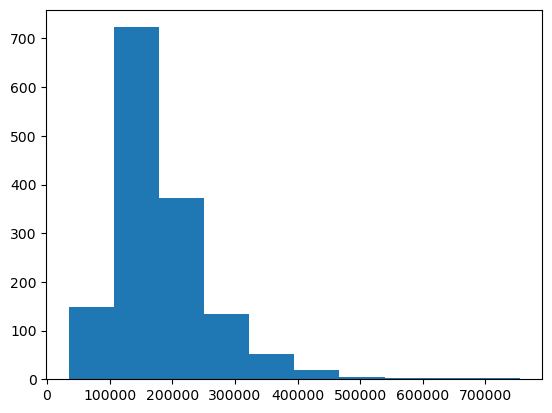

In [93]:
# Visualizing the distribution of Sales Price
plt.hist(df['SalePrice'])
plt.show()

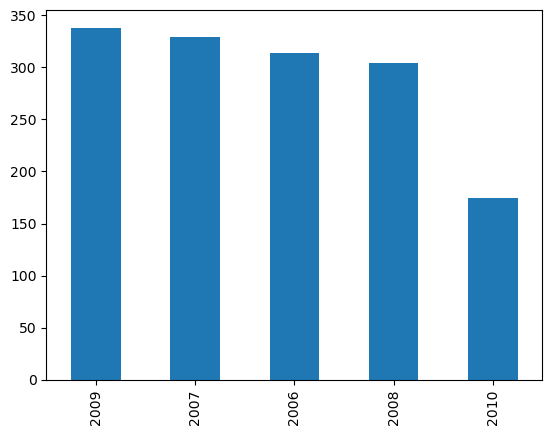

In [94]:
# Visualzing the distribution of houses sold through the years
df['YrSold'].value_counts().plot(kind='bar')
plt.show()

In [95]:
# Understanding the Average house price of the house by the year it was sold
price_yr_df = df.groupby('YrSold')['SalePrice'].mean()
price_yr_df = price_yr_df.sort_values(ascending=False)
print(price_yr_df)

YrSold
2007    186063.151976
2006    182549.458599
2009    179432.103550
2010    177393.674286
2008    177360.838816
Name: SalePrice, dtype: float64


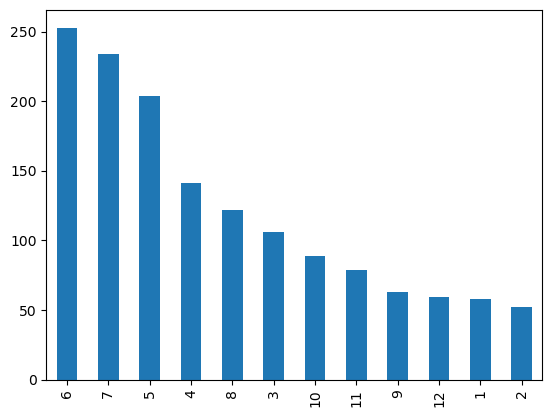

In [96]:
# Visualzing the distribution of houses sold through the months
df['MoSold'].value_counts().plot(kind='bar')
plt.show()

In [97]:
# Understanding the Average house price of the house by the month it was sold
price_mo_df = df.groupby('MoSold')['SalePrice'].mean()
price_mo_df = price_mo_df.sort_values(ascending=False)
print(price_mo_df)

MoSold
9     195683.206349
11    192210.911392
12    186518.966102
7     186331.192308
8     184651.827869
1     183256.258621
3     183253.924528
10    179563.977528
2     177882.000000
6     177395.735178
5     172307.269608
4     171503.262411
Name: SalePrice, dtype: float64


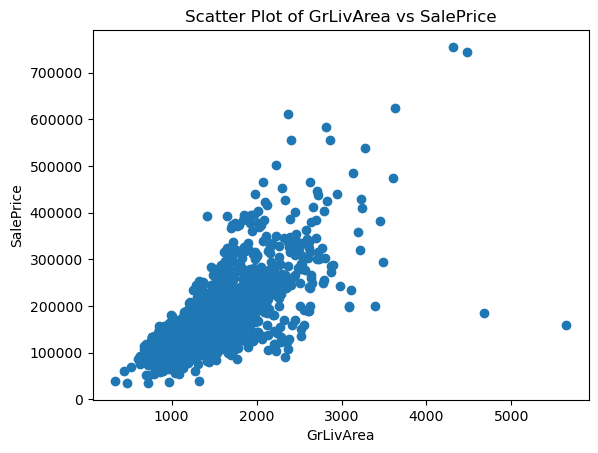

In [98]:
# Scatter plot for GrLivArea vs SalePrice  
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.title('Scatter Plot of GrLivArea vs SalePrice')
plt.xlabel('GrLivArea') # GrLivArea: Above grade (ground) living area square feet
plt.ylabel('SalePrice')
plt.show()

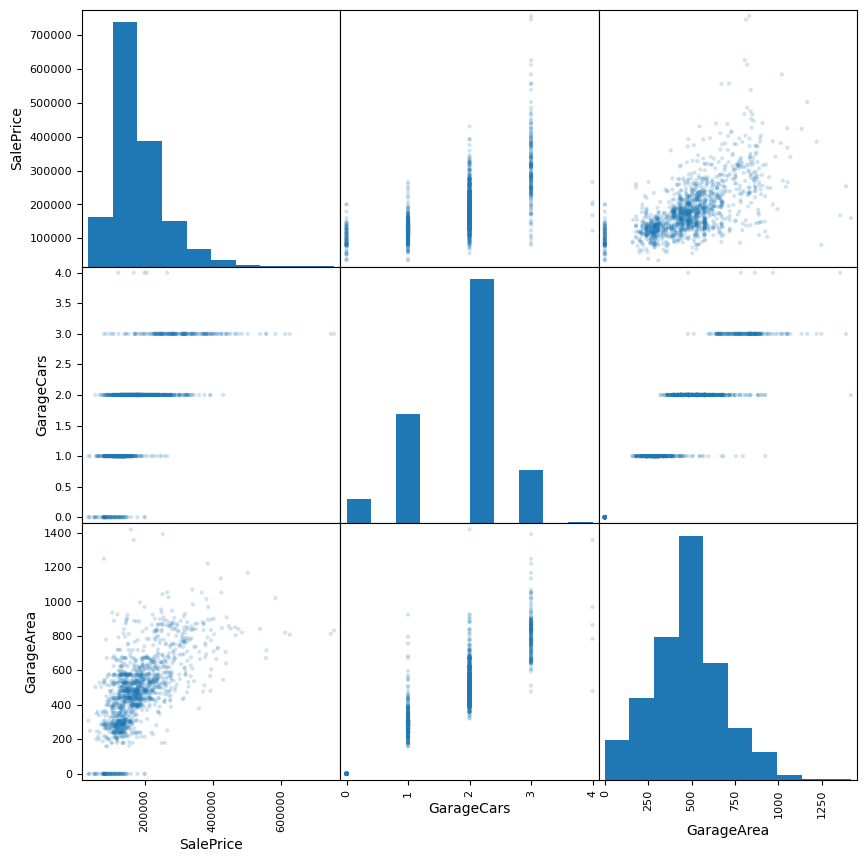

In [99]:
# Creating a scatter plot matrix for SalePrice and Garage elements 
from pandas.plotting import scatter_matrix
scatter_matrix(df[['SalePrice', 'GarageCars', 'GarageArea']], alpha=0.2, figsize=(10, 10))
plt.show()

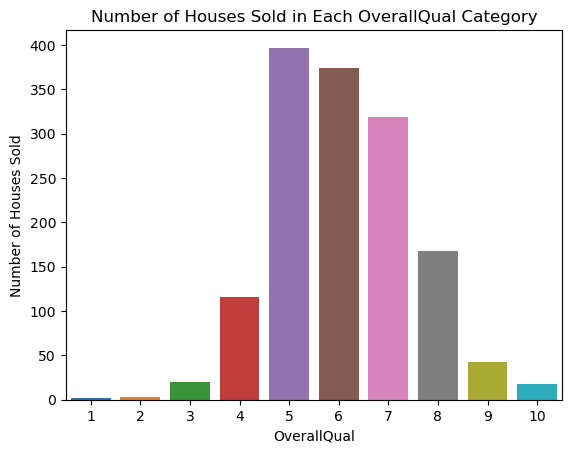

In [100]:
# Looking the at how many houses were sold in each OverQuall level
sns.countplot(x='OverallQual', data=df)
plt.title('Number of Houses Sold in Each OverallQual Category')
plt.xlabel('OverallQual')
plt.ylabel('Number of Houses Sold')
plt.show()

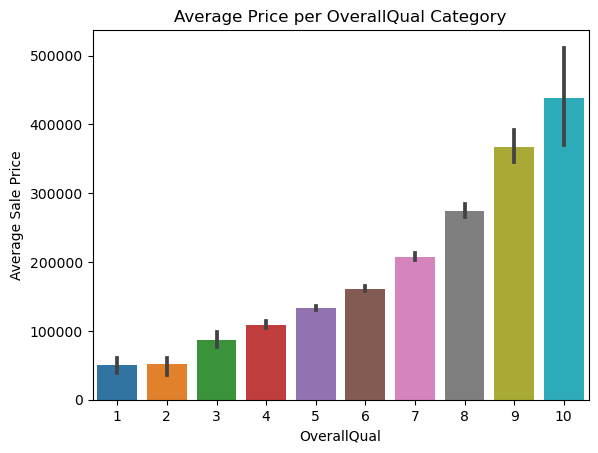

In [101]:
# Create a bar plot for average price per OverallQual category
sns.barplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Average Price per OverallQual Category')
plt.xlabel('OverallQual')
plt.ylabel('Average Sale Price')
plt.show()


In [126]:
# Create a pivot table to summarize the data
# Question: what is the average sale price of houses across different street by overall quality
pivot_table = df.pivot_table(index='OverallQual',
                             columns='Neighborhood',
                             values='SalePrice',
                             aggfunc='mean')
print(pivot_table)

Neighborhood        Blmngtn   Blueste         BrDale        BrkSide  \
OverallQual                                                           
1                       NaN       NaN            NaN   39300.000000   
2                       NaN       NaN            NaN   60000.000000   
3                       NaN       NaN            NaN   67000.000000   
4                       NaN       NaN            NaN  100850.000000   
5                       NaN       NaN  117000.000000  124661.904762   
6                       NaN  137500.0   98809.090909  145843.055556   
7             188660.285714       NaN            NaN  172125.000000   
8             223853.666667       NaN            NaN            NaN   
9                       NaN       NaN            NaN            NaN   
10                      NaN       NaN            NaN            NaN   

Neighborhood        ClearCr        CollgCr        Crawfor        Edwards  \
OverallQual                                                            

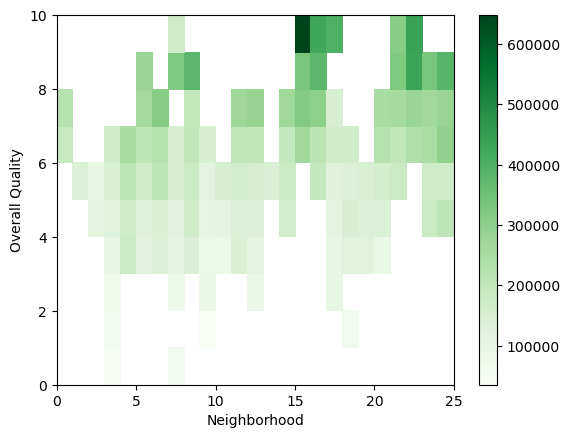

In [127]:
# Create a heatmap to visualize the pivot table
plt.pcolor(pivot_table, cmap='Greens')
plt.colorbar()
plt.xlabel('Neighborhood')
plt.ylabel('Overall Quality')
plt.show()

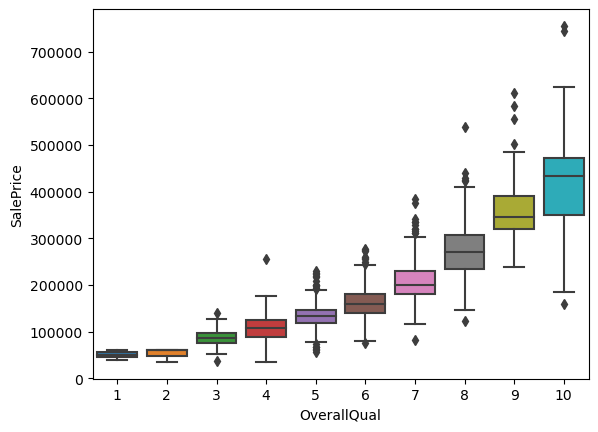

In [128]:
# Create a box plot to visualize the distribution of a numeric column
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.ylabel('SalePrice')
plt.show()

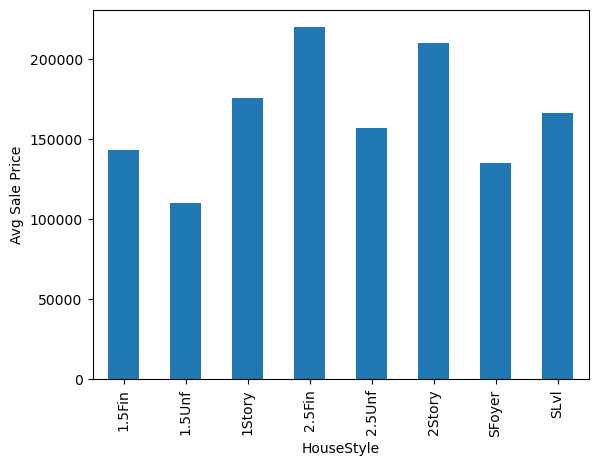

In [129]:
#Create a bar plot to visualize the mean of a numeric column for Sale Price of each of the House Style
df_grouped = df.groupby('HouseStyle')
df_grouped = df_grouped['SalePrice'].mean()
df_grouped.plot(kind='bar')
plt.ylabel('Avg Sale Price')
plt.show()

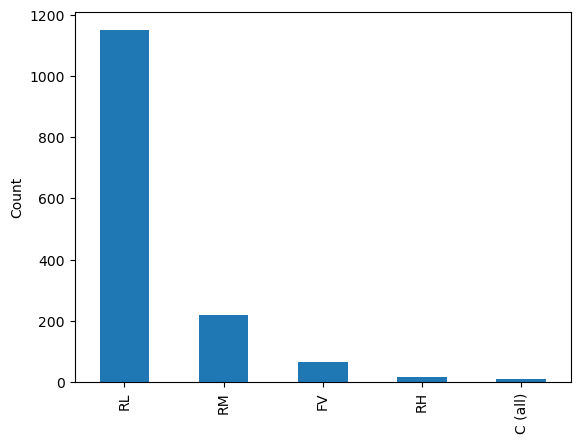

In [130]:
# Create a bar plot to visualize the count of a categorical column
df['MSZoning'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

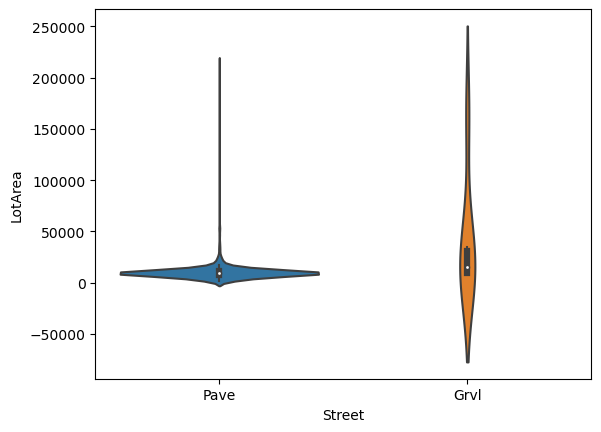

In [134]:
# Create a violin plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.violinplot(x='Street', y='LotArea', data=df)
plt.ylabel('LotArea')
plt.show()

# Historgrams and Box Plots for all Numericals

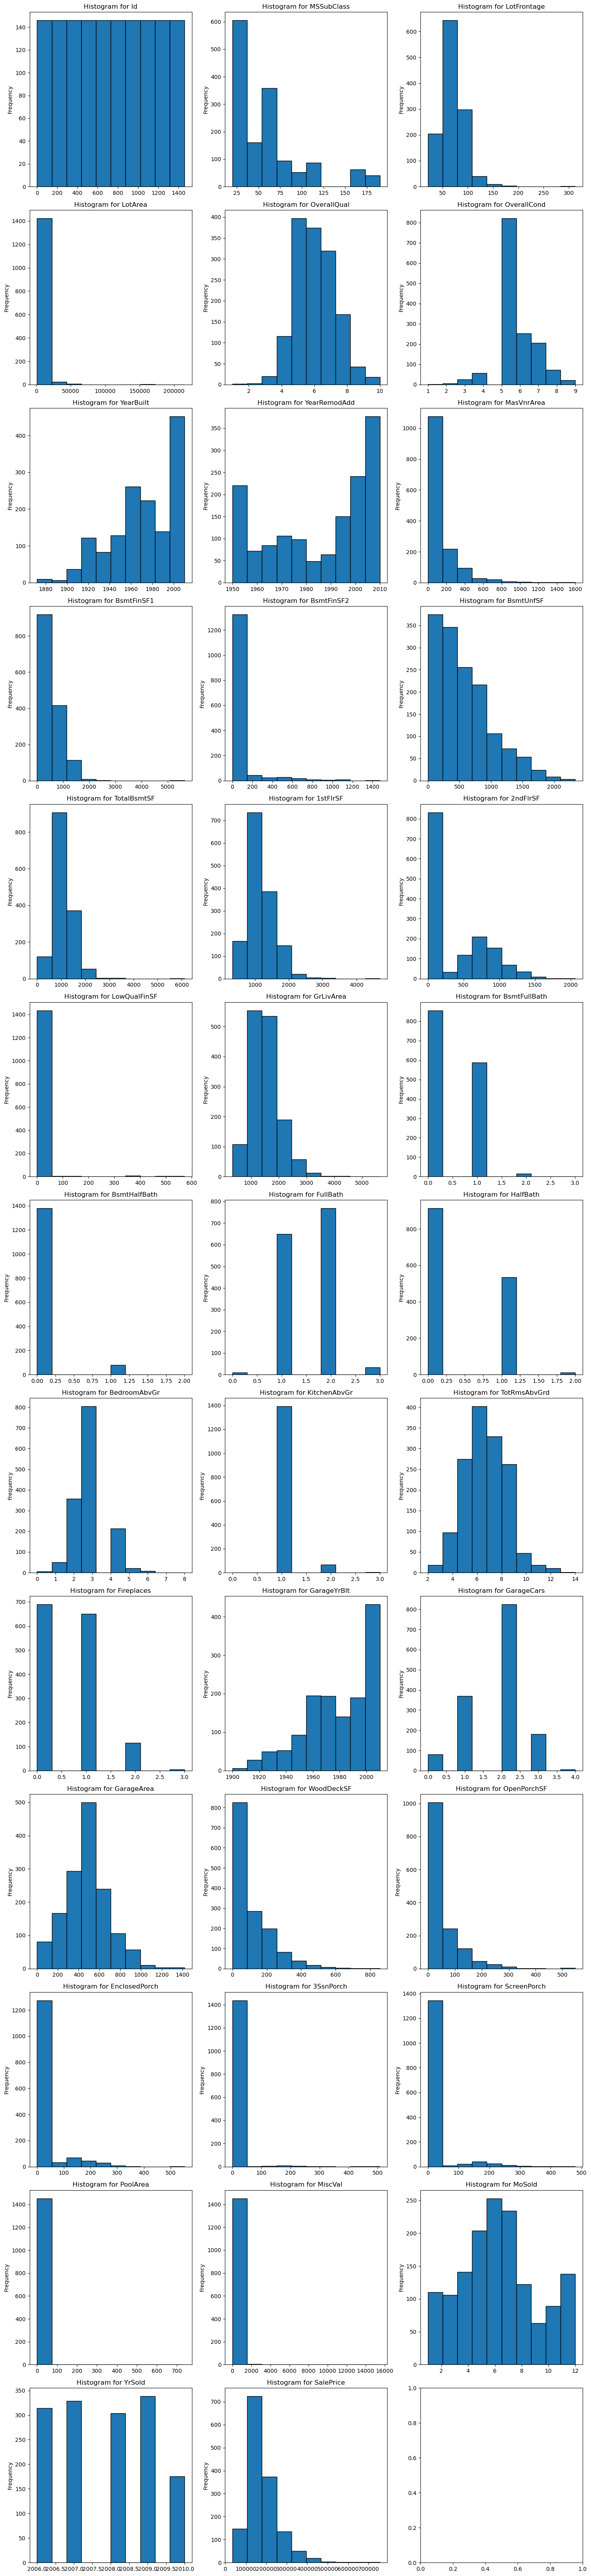

In [103]:
# Extracting only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Setting up subplots
fig, axes = plt.subplots(nrows=len(numeric_columns) // 3 + 1, ncols=3, figsize=(15, 5 * (len(numeric_columns) // 3 + 1)))

# Flattening the axes for easier iteration
axes = axes.flatten()

# Plotting histograms for each numeric variable
for i, column in enumerate(numeric_columns):
    df[column].plot(kind='hist', ax=axes[i], bins=10, edgecolor='black')
    axes[i].set_title(f'Histogram for {column}')

# Adjusting layout
plt.tight_layout()
plt.show()

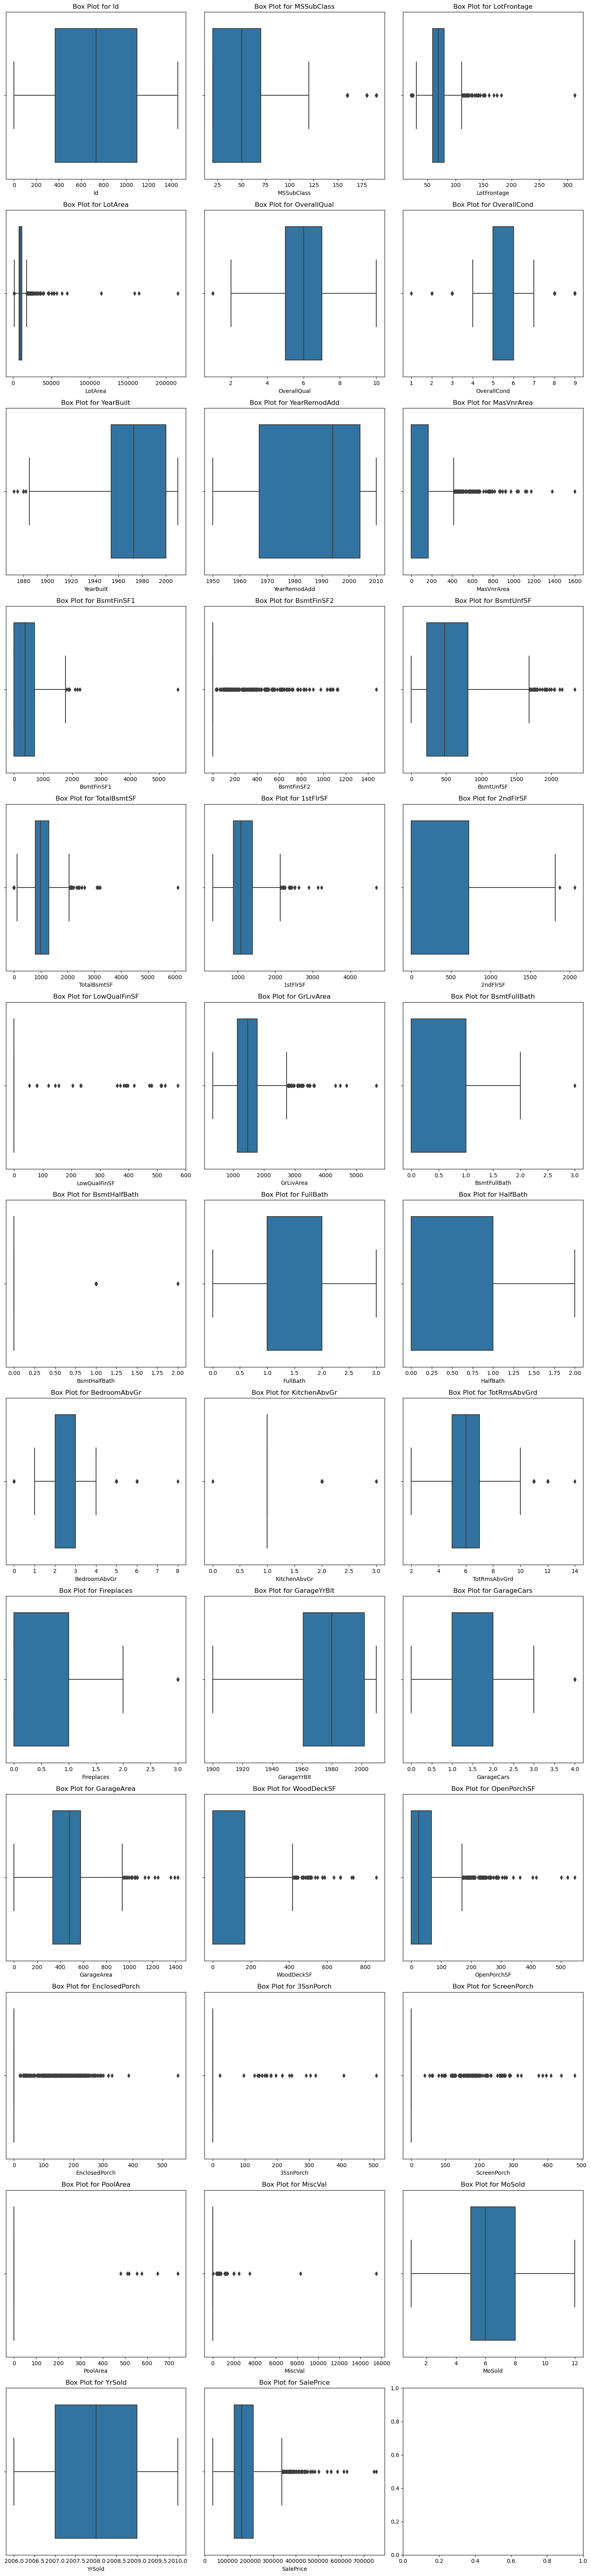

In [54]:
# Extracting only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Setting up subplots
fig, axes = plt.subplots(nrows=len(numeric_columns) // 3 + 1, ncols=3, figsize=(15, 5 * (len(numeric_columns) // 3 + 1)))

# Flattening the axes for easier iteration
axes = axes.flatten()

# Plotting box plots for each numeric variable
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')

# Adjusting layout
plt.tight_layout()
plt.show()

# Count Plots for all Categoricals

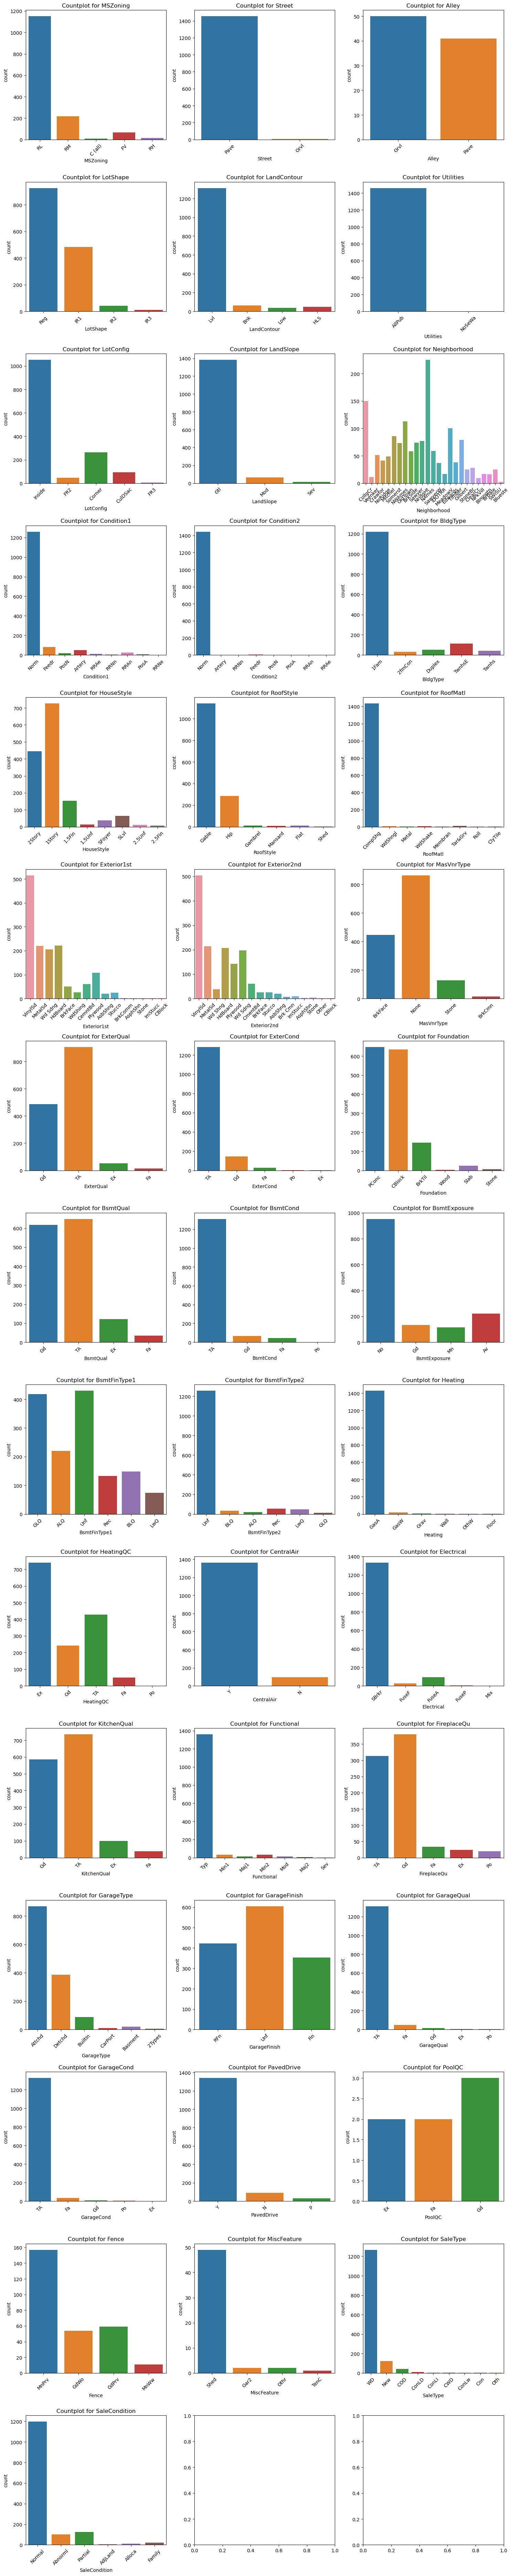

In [52]:
# Extracting only categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Setting up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns) // 3 + 1, ncols=3, figsize=(15, 5 * (len(categorical_columns) // 3 + 1)))

# Flattening the axes for easier iteration
axes = axes.flatten()

# Plotting countplots for each categorical variable
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Countplot for {column}')
    axes[i].tick_params(axis='x', rotation=45)

# Adjusting layout
plt.tight_layout()
plt.show()

# Correlation Matrix Heatmap for numerical variables


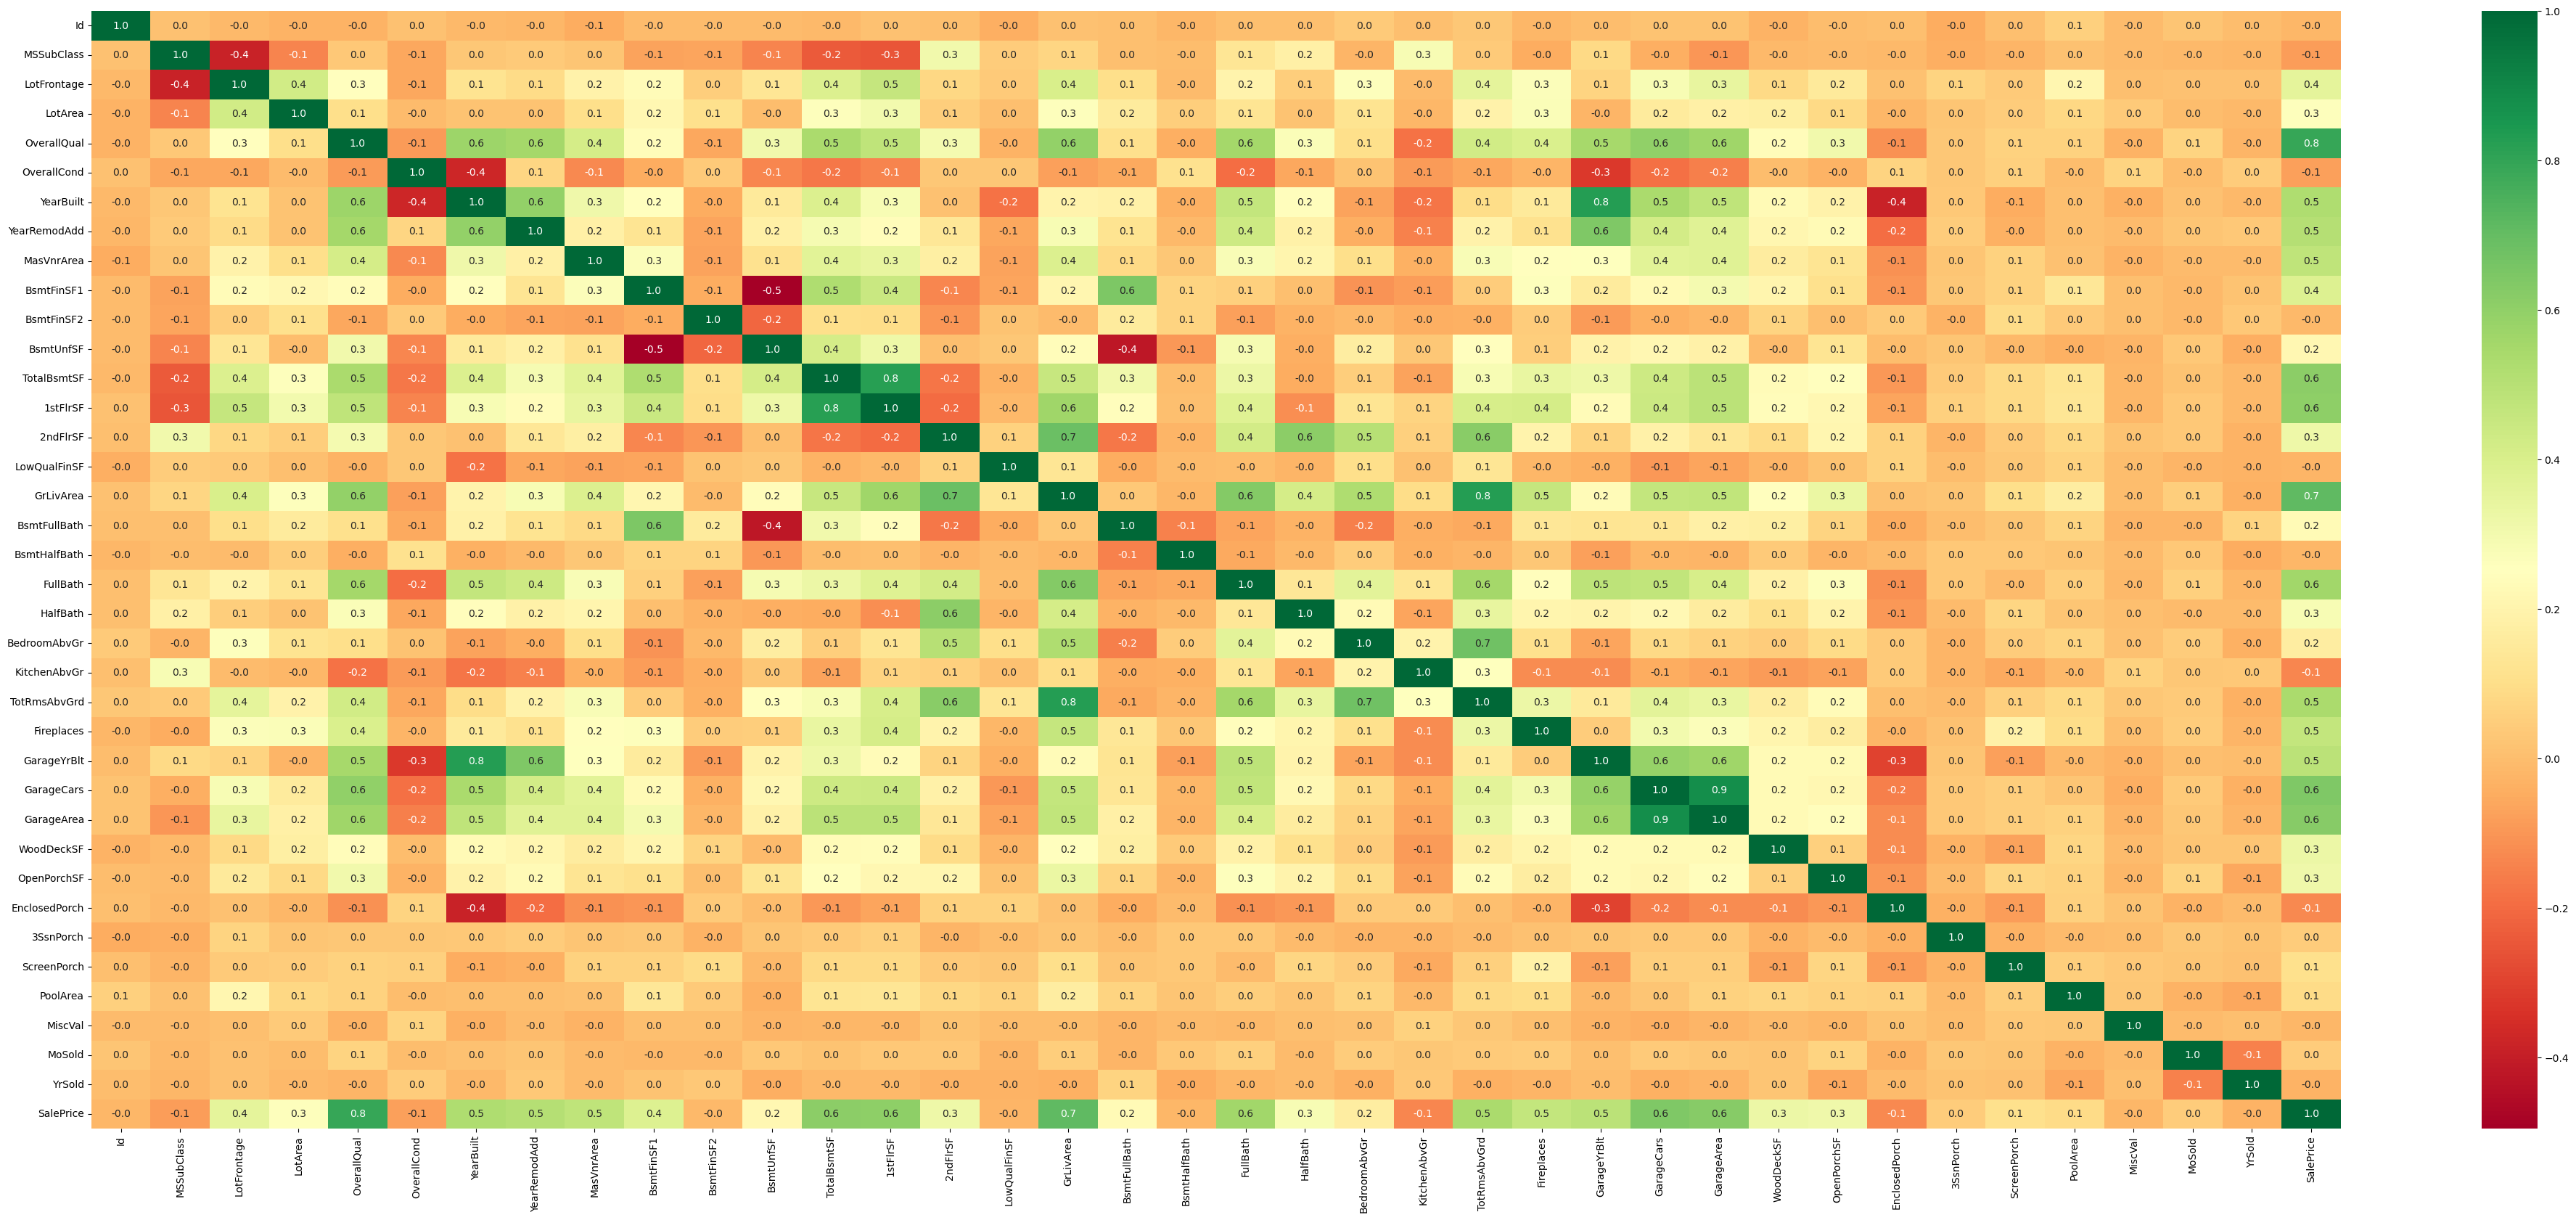

In [125]:
# Seperating Numerical VAriables and Calculating their Correlation
numerical_vars = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_vars.corr()
# Heatmap
#plt.figure(figsize=(16, 14))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
#plt.title("Correlation Matrix Heatmap for Numerical Variables")
#plt.show()

## create a heatmap to visualize the correlation between multiple columns
plt.figure(figsize=(50, 20))
sns.heatmap(numerical_vars.corr(), fmt= ".1f",cmap='RdYlGn', annot=True)
plt.show()

# Summary

## Data Issues and Notes
Missing Values: Several Columns with Missing Values. Notable examples include
"Alley" (93.77% missing), "PoolQC" (99.52% missing), "Fence" (80.75% missing), "MiscFeature" (96.30% missing), "FirePlaceQU"(47.26%)"

Outliers: Numerous outliers are observed in several columns. 

Cardinality: Some categorical columns, such as "Street" and "Utilities," have a dominant category, which may limit their discriminatory power.

    
## Recommendations

Drop the columns with a high percentage of missing values.
Use Imputation to handle the missing values in the other columns.
For the Outliers, investigate it better, and possibly apply transformations to mitigate the impact of the outliers 

## Conclusion

The dataset exhibits missing values, outliers, and certain patterns in descriptive statistics. Handling missing values and outliers is crucial for robust analysis. Further exploration and feature engineering could enhance the model's predictive capabilities. 

# Part 2 Pre-Processing

In [15]:
# create a copy of the original DataFrame
df_preprocessed = df.copy()

In [16]:
# Checking columns with Missing Values
print(df_preprocessed.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [17]:
# Lets take a clsoer look at the columns with a high number of NA's
variables_with_null = ['PoolQC', 'Fence', 'MiscFeature', 'Alley','FireplaceQu']

# Create a DataFrame with only these variables
nulls_df = df_preprocessed[variables_with_null]

In [18]:
# Calculate the percentage of missing values for each variable
missing_percentage = (nulls_df.isnull().sum() / len(nulls_df)) * 100 # From Python Refresher
print(missing_percentage)


PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
Alley          93.767123
FireplaceQu    47.260274
dtype: float64


# The columns PoolQC, MiscFeature, Alley, and Fence have more than 47% missing values.
Consequently, we should refer to the Data Description to assess the importance of this information. This evaluation will help us determine whether to retain these columns in the DataFrame or if it is appropriate to drop them.

Based on the Data Description, the presence of NA in these variables indicates that most houses in our dataset do not have the features described by these variables. Therefore, since the majority of houses lack these features, their absence is not likely to significantly influence our analysis. Furthermore, retaining these variables could potentially pose challenges for our model in later stages. Hence, it seems reasonable to consider dropping these columns from our dataset.

In [19]:
# Drop the specified columns
df_preprocessed = df_preprocessed.drop(columns=variables_with_null)

In [20]:
# Checking which variables still have missing values
print(df_preprocessed.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [21]:
# Creating a list and checking data types of remaining columns with missing values
missing_columns = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 
                    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 
                    'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

data_types = df_preprocessed[missing_columns].dtypes
print(data_types)

LotFrontage     float64
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object


# Handling Numerical missing values

In [23]:
# For LotFrontage we are gonna replace the missing values with the mean value
mean_lot_frontage = df_preprocessed['LotFrontage'].mean()
# Replace missing values with the mean
df_preprocessed['LotFrontage'].fillna(mean_lot_frontage, inplace=True)

# For MasVnrArea we are going to replace with the mean
masvnrarea_mean = df_preprocessed['MasVnrArea'].mean()
# Replace missing values with the mean
df_preprocessed['MasVnrArea'].fillna(masvnrarea_mean, inplace=True)

# For 'GarageYrBlt,' we have decided to drop all rows with missing values from the dataset. 
# This decision is driven by the fact that taking the mean is not appropriate for year.
# Using the mean, could potentially skew our data and negatively impact further analysis. 
# Therefore, the chosen approach is to remove rows with missing values for 'GarageYrBlt' to 
# Maintain data integrity and reliability in subsequent analyses.

df_preprocessed = df_preprocessed.dropna(subset=['GarageYrBlt'])

# Handling Categorical Missing Values

In [24]:
# For the Categorical columns we will use their mode to replace the missing values
categorical_columns = df_preprocessed.select_dtypes(include=['object']).columns  # Select all object (categorical) columns
df_preprocessed[categorical_columns] = df_preprocessed[categorical_columns].fillna(df_preprocessed[categorical_columns].mode().iloc[0])

In [25]:
# Checking if we still have missing values 
print(df_preprocessed.isnull().sum())
df_preprocessed.info()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [29]:
# Renaming our Data after Handling Missing Values
df_clean = df_preprocessed
df_clean.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

In [114]:
# Using skew and kurtosis to understand which variables would benefit from Scaling or Normalization
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for all numerical variables
skewness = df_clean.select_dtypes(include=['float64', 'int64']).apply(lambda x: skew(x))
kurt = df_clean.select_dtypes(include=['float64', 'int64']).apply(lambda x: kurtosis(x))
non_normal_result = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurt})
print(non_normal_result)

                Skewness    Kurtosis
Id             -0.005086   -1.195458
MSSubClass      1.378253    1.553140
LotFrontage     2.489300   23.064928
LotArea        11.999967  194.564078
OverallQual     0.287767   -0.059180
OverallCond     0.865755    1.036367
YearBuilt      -0.658845   -0.345930
YearRemodAdd   -0.543473   -1.219351
MasVnrArea      2.597458    9.567484
BsmtFinSF1      1.676525   11.210954
BsmtFinSF2      4.190085   19.391083
BsmtUnfSF       0.926953    0.450174
TotalBsmtSF     1.619838   14.025905
1stFlrSF        1.388771    5.880194
2ndFlrSF        0.785254   -0.602097
LowQualFinSF   10.700931  118.708419
GrLivArea       1.409761    5.212630
BsmtFullBath    0.487586   -1.274100
BsmtHalfBath    3.913319   14.171051
FullBath       -0.015795   -0.856084
HalfBath        0.579695   -1.283593
BedroomAbvGr   -0.011934    1.396633
KitchenAbvGr    5.088392   25.713878
TotRmsAbvGrd    0.670899    0.702058
Fireplaces      0.585409   -0.255816
GarageYrBlt    -0.648708   -0.421174
G

# Handling Outliers

In the context of houses and their various features, it's natural to encounter variations in sizes. The presence of larger houses is a common aspect of real estate datasets. Additionally, the normalization process will help mitigate the impact of outliers, allowing for a more balanced analysis. .

# Encoding 

In [109]:
# Finding categorical columns
categorical_columns = df_clean.select_dtypes(include='object').columns
# Applying one-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_columns, drop_first=True)
df_encoded.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0     208500            0            0            1            0            1   
1     181500            0            0            1            0            1   
2     223500            0            0            1            0            1   
3     140000            0            0            1            0            1   
4     250000            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1           

# Normalization 

In [122]:
from sklearn.preprocessing import StandardScaler

def normalize_columns(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# List of columns to normalize
columns_to_normalize = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                         'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                         'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
                         'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                         'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

# Normalizing my the columns
df_normalized = normalize_columns(df_encoded, columns_to_normalize)
df_normalized.head(10)


Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0   1    0.096984    -0.253938 -0.219941            7            5       2003   
1   2   -0.878340     0.430222 -0.107317            6            8       1976   
2   3    0.096984    -0.117106  0.054274            7            5       2001   
3   4    0.340815    -0.481991 -0.112214            7            5       1915   
4   5    0.096984     0.612665  0.349054            8            5       2000   
5   6   -0.146847     0.658276  0.334853            5            5       1993   
6   7   -0.878340     0.202169 -0.059917            8            5       2004   
7   8    0.096984    -0.023606 -0.030733            7            6       1973   
8   9   -0.146847    -0.892487 -0.448126            7            5       1931   
9  10    3.266787    -0.938098 -0.320812            5            6       1939   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003    0.473157    0.544957   -0.292833  -0.948701    -0.500778   
1          1976   -0.592392    1.136873   -0.292833  -0.646571     0.429959   
2          2002    0.288317    0.066202   -0.292833  -0.308365    -0.354060   
3          1970   -0.592392   -0.521362   -0.292833  -0.069366    -0.730023   
4          2000    1.310374    0.433973   -0.292833  -0.182101     0.161742   
5          1995   -0.592392    0.601537   -0.292833  -1.142606    -0.638325   
6          2005    0.418792    1.987753   -0.292833  -0.572165     1.401960   
7          1973    0.712362    0.877910   -0.098026  -0.799891     0.074629   
8          1950   -0.592392   -0.991413   -0.292833   0.859572    -0.280702   
9          1950   -0.592392    0.860501   -0.292833  -0.971248    -0.191296   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.830062  1.139240     -0.103073   0.337816      1.107785     -0.246594   
1  0.219374 -0.804347     -0.103073  -0.525462     -0.838248      3.951591   
2 -0.664633  1.166551     -0.103073   0.484265      1.107785     -0.246594   
3 -0.558656  0.916206     -0.103073   0.351305      1.107785     -0.246594   
4 -0.083050  1.592137     -0.103073   1.278172      1.107785     -0.246594   
5 -0.985151  0.483792     -0.103073  -0.332766      1.107785     -0.246594   
6  1.336015 -0.804347     -0.103073   0.306985      1.107785     -0.246594   
7 -0.181273  1.432827     -0.103073   1.070061      1.107785     -0.246594   
8 -0.400982  0.907102     -0.103073   0.461141     -0.838248     -0.246594   
9 -0.258817 -0.804347     -0.103073  -0.881949      1.107785     -0.246594   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.766392  1.202783      0.172112     -0.196113      0.910763   -0.993835   
1  0.766392 -0.788379      0.172112     -0.196113     -0.347696    0.554751   
2  0.766392  1.202783      0.172112     -0.196113     -0.347696    0.554751   
3 -1.058918 -0.788379      0.172112     -0.196113      0.281534    0.554751   
4  0.766392  1.202783      1.448148     -0.196113      1.539993    0.554751   
5 -1.058918  1.202783     -2.379960     -0.196113     -0.976926   -0.993835   
6  0.766392 -0.788379      0.172112     -0.196113      0.281534    0.554751   
7  0.766392  1.202783      0.172112     -0.196113      0.281534    2.103337   
8  0.766392 -0.788379     -1.103924      4.906537      0.910763    2.103337   
9 -1.058918 -0.788379     -1.103924      4.906537     -0.976926    2.103337   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     0.992426    0.204944    0.254496   -0.769478     0.210529   
1    -0.101543    0.204944   -0.219608    1.583403    -0.725243   
2     0.911391    0.204944    0.577749   -0.769478    -0.080941   
3     0.789839    1.792682    0.760926   -0.769478    -0.188325   
4     0.870874    1.792682    1.806110    0.746472     0.563361   
5     0.587252    0.204944   -0.111857   -0.453655    -0.265027   
6     1.032943    0.204944    0.728600    1

# Idness

In [116]:
# Checking for Duplicates
num_duplicates = df_normalized.duplicated().sum()

print("Number of Duplicates:", num_duplicates)

Number of Duplicates: 0


# 3 Post Processing

# Colinearity

In [119]:
# Creating the Corr Matrix
corr_matrix = df_normalized.corr()

# Display the correlation matrix
print(corr_matrix)

                             Id  MSSubClass  LotFrontage   LotArea  \
Id                     1.000000    0.019529    -0.010735 -0.035147   
MSSubClass             0.019529    1.000000    -0.357738 -0.136092   
LotFrontage           -0.010735   -0.357738     1.000000  0.301368   
LotArea               -0.035147   -0.136092     0.301368  1.000000   
OverallQual           -0.041980    0.050092     0.226413  0.090016   
OverallCond            0.007146   -0.097027    -0.042083 -0.002869   
YearBuilt             -0.020228    0.060041     0.104359 -0.005921   
YearRemodAdd          -0.025519    0.036926     0.080983  0.002764   
MasVnrArea            -0.053908    0.033745     0.175850  0.096104   
BsmtFinSF1            -0.004083   -0.067904     0.220515  0.210145   
BsmtFinSF2            -0.007278   -0.079326     0.041869  0.110011   
BsmtUnfSF             -0.010067   -0.138829     0.109364 -0.009707   
TotalBsmtSF           -0.017278   -0.242558     0.359260  0.252932   
1stFlrSF            

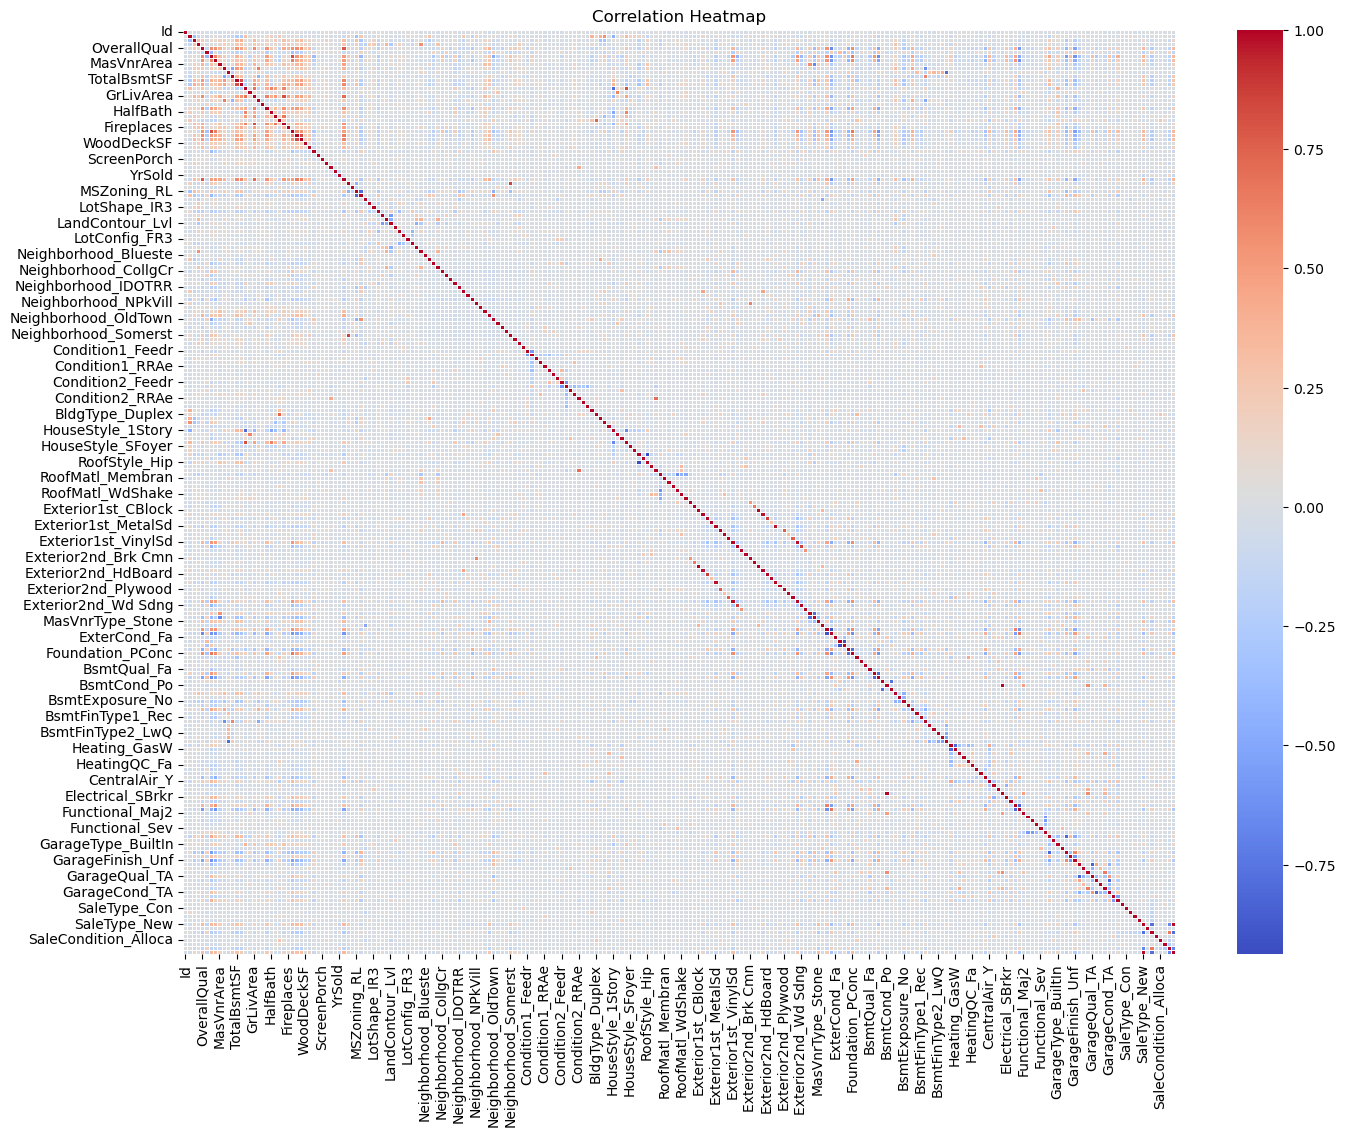

In [120]:
# Create a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Feature Selection

In [121]:
# Based on Business Understanding 
#columns_to_drop = ['Id', 'MiscVal', 'MoSold', 'YrSold', 'Street', 'Utilities', 'LandSlope']
#df_clean2 = df_normalized.drop(columns=columns_to_drop)